In [228]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Give a detailed data description and objective


#### The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset. 






# Objective

### To conduct a thorough exploratory data analysis of the employment outcomes for engineering graduates, focusing on key factors like salary, specialization, and gender, and to address specific research questions related to these factors.


# Import the data and display the head, shape and description of the data.

In [229]:
df = pd.read_csv('./data/data.xlsx - Sheet1.csv')

In [230]:
df.shape

(3998, 39)

In [231]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [232]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

# Univariate Analysis


In [234]:
# Finding duplicates to clean the data
df[df.duplicated(keep=False)]

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience


In [235]:
# Finding missing values to clean the data
missing_values = df.isnull().sum()
missing_values

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

# Understand the probability and frequency distribution of each numerical column

In [236]:
# List of numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

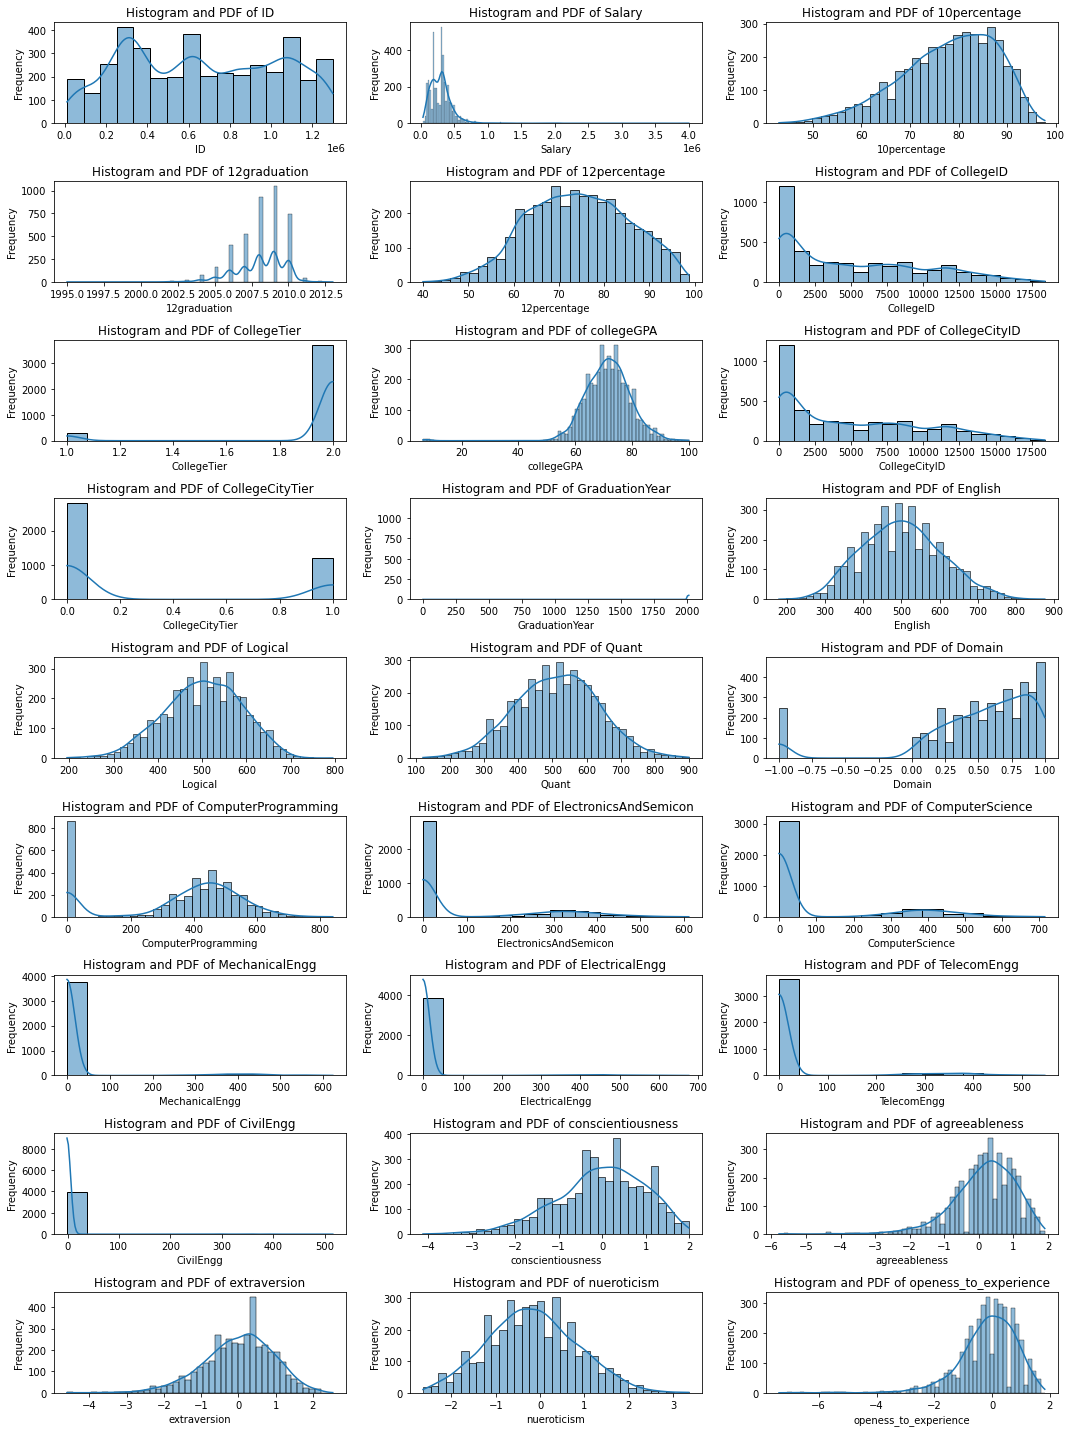

In [237]:
# Set up the figure with a grid
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(15, 20))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the numerical columns and plot histograms
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram and PDF of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Observation
###### Salary: Right-skewed with most salaries on the lower end and a few very high outliers.
###### 10th & 12th Percentage: Approximately normal distributions with a slight skew towards higher scores.
###### Graduation Year: Clustered around 2010-2012, with a right-skew in recent years.
###### CollegeID & CollegeCityID: Highly right-skewed, indicating a few dominant institutions or locations.
###### CollegeTier: Bimodal, reflecting two main categories of colleges.
###### CollegeGPA: Normal distribution, with most GPAs between 60 and 80.
###### English, Logical, Quant: Roughly normal distributions with slight right skewness.
###### Specialized Subjects (Engineering, Programming): Heavy concentration of low scores with long tails, indicating a few high performers.
###### Personality Traits: Generally normal distributions, showing balanced traits across the sample.
###### Overall, the dataset exhibits a mix of normal and skewed distributions, with notable skewness in variables like salary and specialized subjects.

# Find the outliers in each numerical column

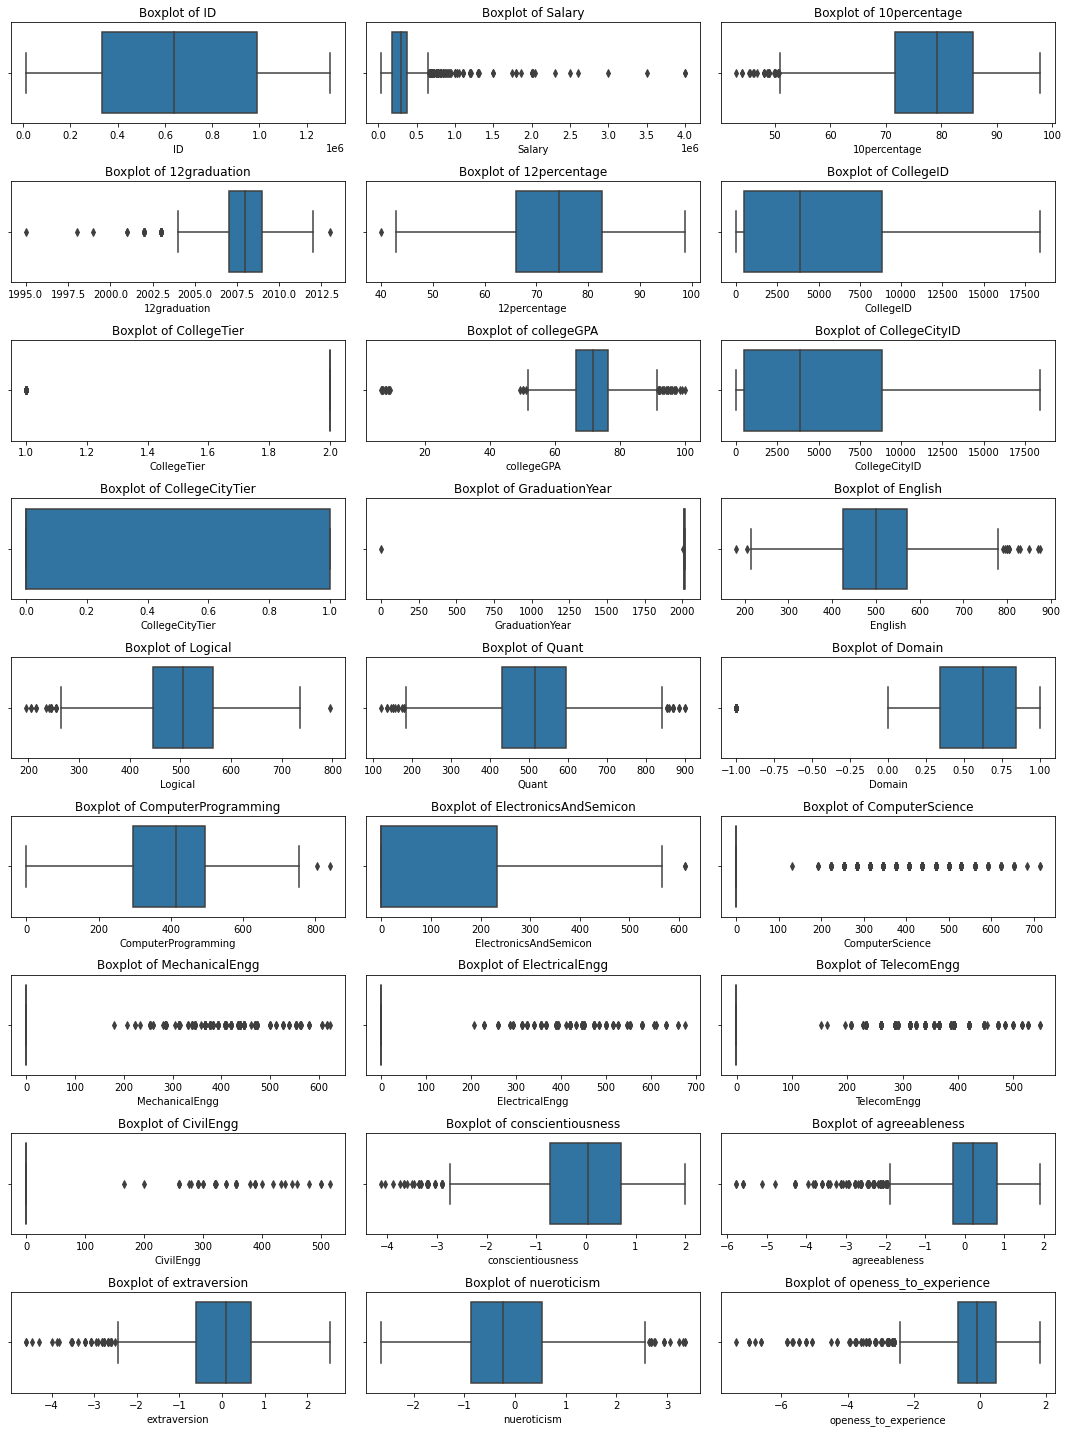

In [238]:
# List of numerical columns for which you want to create box plots
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the figure with a grid of 3x4
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the numerical columns and create box plots
for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Make sure there are enough subplots for each column
        sns.boxplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_xlabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
               

### Observations:
###### Salary: Most salaries are on the lower side, but there are some very high outliers.
###### 10th & 12th Percentages: Scores mostly cluster around 70-80%, with a few outliers, especially lower ones.
###### Graduation Year: Most students graduated around 2010-2012, with a few earlier outliers.
###### College Data (ID, CityID, Tier): A wide range of college data is represented, with notable distinctions in college tiers.
###### GPA: Most students have GPAs between 60-80, though some fall outside this range.
###### English, Logical, Quant: These scores are generally well-distributed, but some students have much higher or lower scores than average.
###### Specialized Subjects (Engineering, Programming): A lot of students have lower scores in these areas, with a few high achievers standing out.
###### Personality Traits: Traits are mostly balanced, but there are some individuals with more extreme characteristics.
###### Overall, while most data points fall within expected ranges, there are some notable outliers, particularly in salary and specialized subjects.

# Understand the frequency distribution of each categorical Variable/Column

In [268]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['Unnamed: 0', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10board', '12board', 'Degree', 'Specialization', 'CollegeState'],
      dtype='object')

In [240]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [241]:
unique_counts = df[['DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10board', '12board', 'Degree', 'Specialization', 'CollegeState']].nunique()
unique_counts

DOJ                 81
DOL                 67
Designation        419
JobCity            339
Gender               2
DOB               1872
10board            275
12board            340
Degree               4
Specialization      46
CollegeState        26
dtype: int64

In [242]:
df['Designation'].value_counts()

software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

In [243]:
df['Specialization'].value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

### Observations:
###### Job Focus: Most employees are in tech roles, especially in software and systems engineering.
###### Geography: Employees work in many different cities, showing wide distribution.
###### Education: Strong emphasis on engineering, particularly in electronics and IT, with diverse educational backgrounds.
###### Demographics: The data shows a range of ages and a binary gender split.
###### Employment Dates: There’s a mix of different joining and leaving dates.
###### In short, the data showcases a tech-heavy workforce spread across various locations with diverse educational credentials.








#  Bivariate Analysis

## Discover the relationships between numerical columns using Scatter plots, hexbin plots, pair plots, etc..

In [244]:
numerical_cols

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [245]:
len(numerical_cols)

27

<AxesSubplot:>

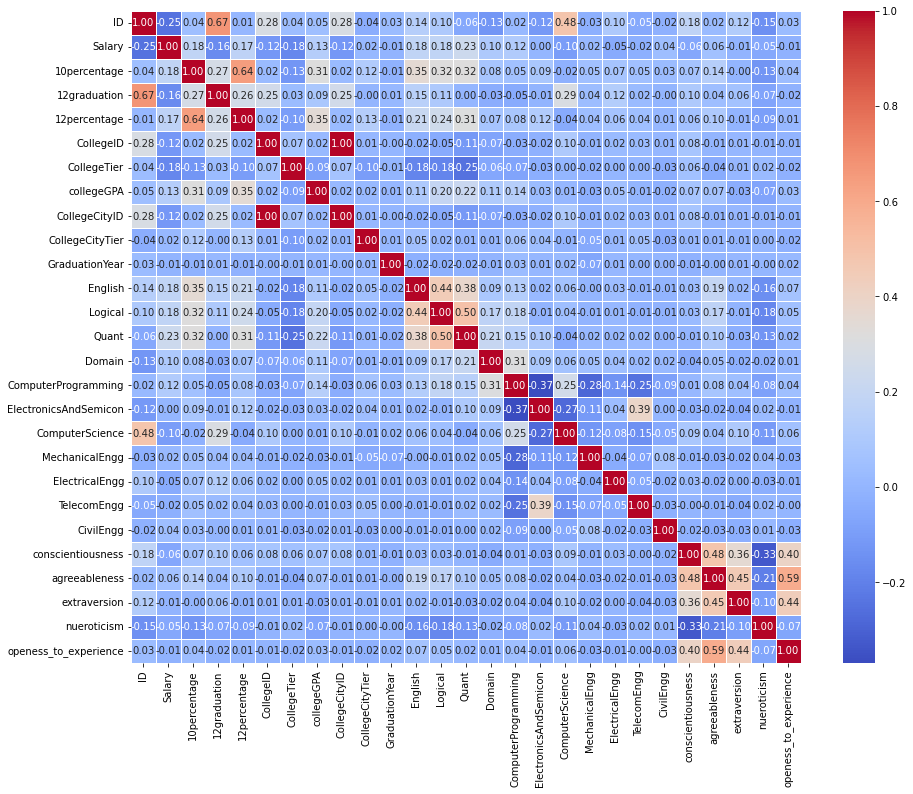

In [246]:
#Heatmap
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

In [247]:
# Unstack the correlation matrix to get pairs
corr_pairs = correlation_matrix.unstack()

# Filter pairs with correlation greater than 0.5 or less than -0.5
strong_pairs = corr_pairs[(corr_pairs > 0.5) | (corr_pairs < -0.5)]

# Remove self-correlations (correlation of a column with itself)
strong_pairs = strong_pairs[strong_pairs != 1].drop_duplicates()
strong_pairs

ID             12graduation             0.673102
10percentage   12percentage             0.643378
Logical        Quant                    0.500152
agreeableness  openess_to_experience    0.591541
dtype: float64

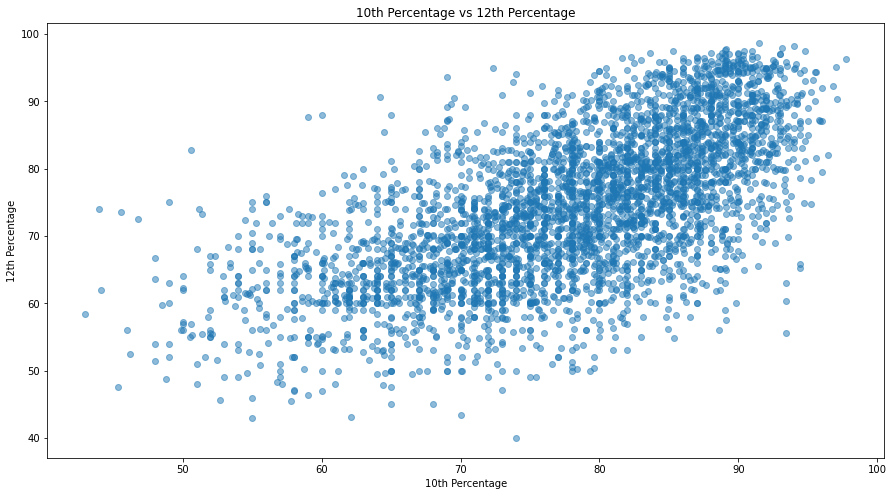

In [248]:
# Scatter plot for 10percentage vs 12percentage
plt.figure(figsize=(15, 8))
plt.scatter(df['10percentage'], df['12percentage'], alpha=0.5)
plt.title('10th Percentage vs 12th Percentage')
plt.xlabel('10th Percentage')
plt.ylabel('12th Percentage')
plt.show()

##### 10th Percentage and 12th Percentage (0.643):

Students who scored well in their 10th grade also tend to perform well in their 12th grade, as shown by the strong positive correlation.

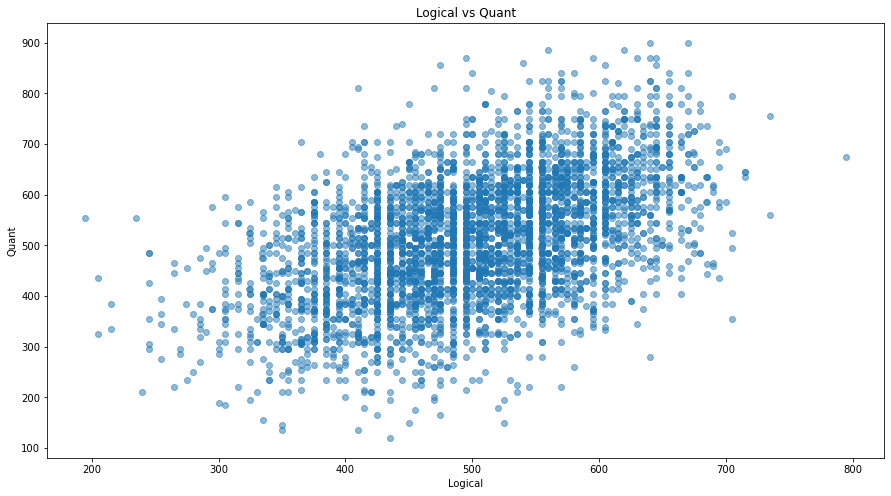

In [249]:
# Scatter plot for Logical vs Quant
plt.figure(figsize=(15, 8))
plt.scatter(df['Logical'], df['Quant'], alpha=0.5)
plt.title('Logical vs Quant')
plt.xlabel('Logical')
plt.ylabel('Quant')
plt.show()

#### Logical and Quant (0.500):

Logical reasoning skills are moderately correlated with quantitative abilities, suggesting that students who are good at logic tend to be good at math-related subjects as well.


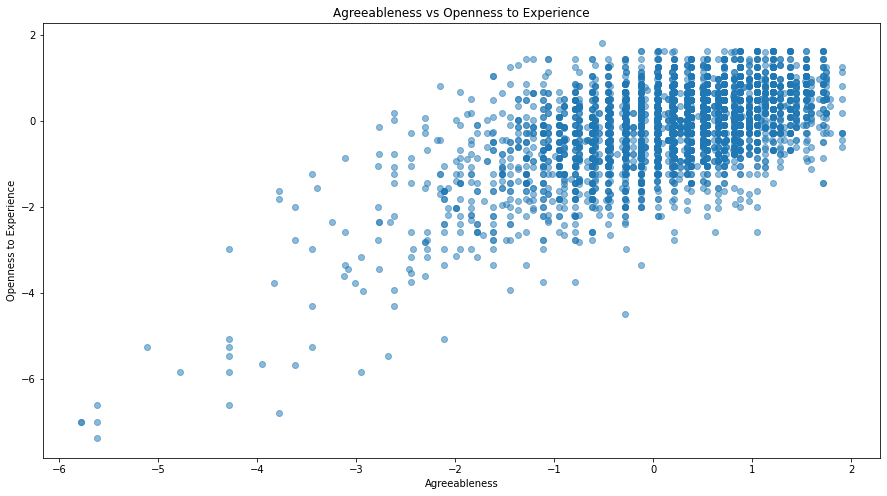

In [250]:
# Scatter plot for Agreeableness vs Openness to Experience
plt.figure(figsize=(15, 8))
plt.scatter(df['agreeableness'], df['openess_to_experience'], alpha=0.5)
plt.title('Agreeableness vs Openness to Experience')
plt.xlabel('Agreeableness')
plt.ylabel('Openness to Experience')
plt.show()

#### Agreeableness and Openness to Experience (0.592):

There’s a strong positive correlation between being agreeable and being open to new experiences, indicating that these personality traits often go hand-in-hand.


#### These correlations highlight important relationships within the dataset, particularly in academic performance and personality traits.

## Identify the patterns between categorical and numerical columns using swarmplot, boxplot, barplot, etc..

In [251]:
df_1 = df[['CollegeState', 'Salary']]

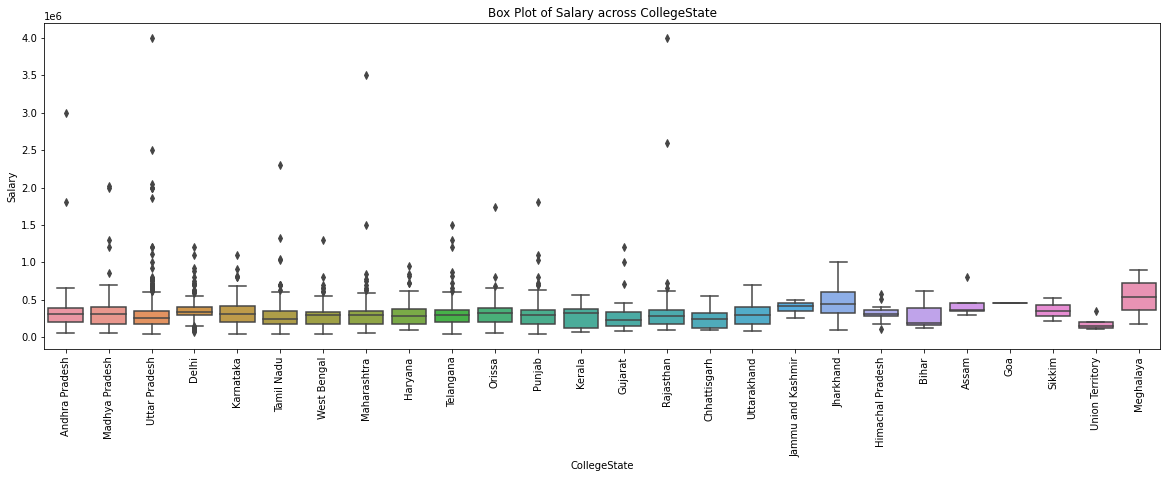

In [252]:
#Boxplot
plt.figure(figsize=(20, 6))
sns.boxplot(x='CollegeState', y='Salary', data=df_1)
plt.title('Box Plot of Salary across CollegeState')
plt.xticks(rotation=90)
plt.show()

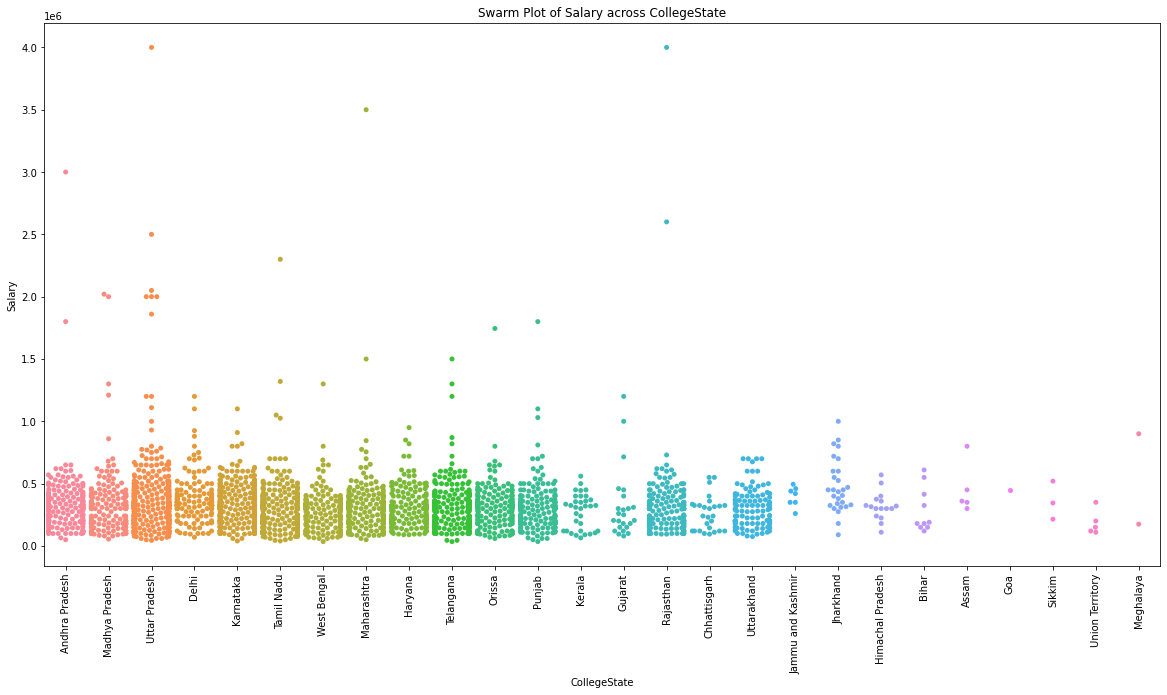

In [253]:
#Swarmplot
plt.figure(figsize=(20, 10))
sns.swarmplot(x='CollegeState', y='Salary', data=df_um)
plt.title('Swarm Plot of Salary across CollegeState')
plt.xticks(rotation=90)
plt.show()

### Observations:
Most states have similar median salaries, typically on the lower side around 0.5 million, but Meghalaya stands out with higher median salaries and more variability.
Outliers are common, especially in states like Delhi, Karnataka, and Andhra Pradesh, indicating that some individuals earn much more than the average.
Salary ranges vary widely across states, with some states like Himachal Pradesh and Meghalaya showing higher salary potentials.
In essence, while most graduates earn similar salaries, a few states offer opportunities for significantly higher earnings, with Meghalaya being a notable standout.

## Identify relationships between categorical and categorical columns using stacked bar plots.

In [174]:
# Create a contingency table
crosstab = pd.crosstab(df['Specialization'], df['Gender'])
crosstab

Gender,f,m
Specialization,,
aeronautical engineering,1,2
applied electronics and instrumentation,2,7
automobile/automotive engineering,0,5
biomedical engineering,2,0
biotechnology,9,6
ceramic engineering,0,1
chemical engineering,1,8
civil engineering,6,23
computer and communication engineering,0,1


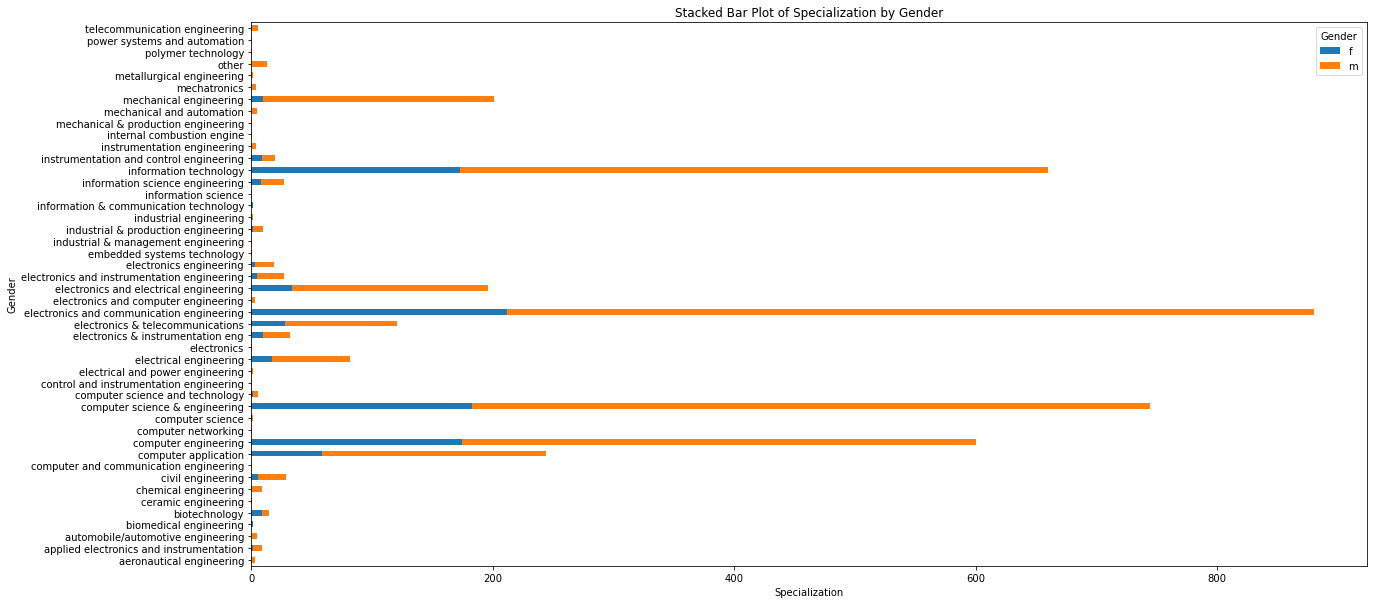

In [269]:
# Stacked Bar Plot
crosstab.plot(kind='barh', stacked=True, figsize=(20, 10))
plt.title('Stacked Bar Plot of Specialization by Gender')
plt.xlabel('Specialization')
plt.ylabel('Gender')
plt.show()

### Observations:
###### Engineering specializations are male-dominated: In most specializations, particularly in fields like Mechanical Engineering and Electronics and Communication Engineering, men significantly outnumber women.
###### Women are more represented in certain fields: Specializations like Information Technology and Computer Science show a relatively higher representation of women, but men still lead in numbers.
###### Overall imbalance: The plot highlights a noticeable gender imbalance across most engineering specializations, with men being the majority in nearly all fields.
###### This summary reflects the gender distribution across different engineering specializations, emphasizing the male dominance in most fields.

# Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.


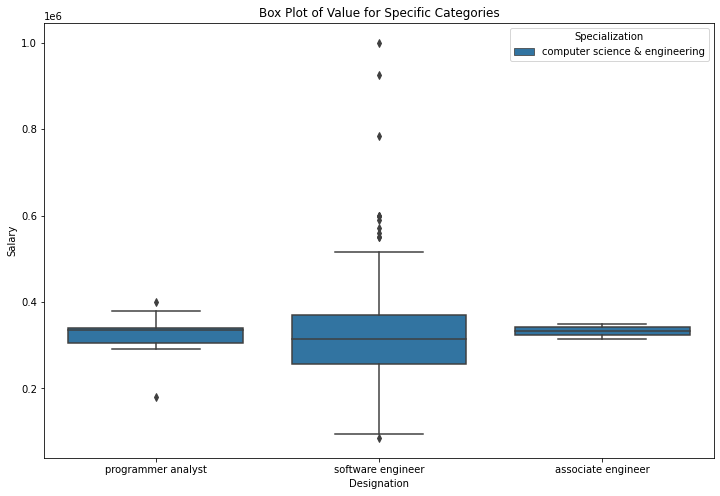

In [195]:
# To filter specific categories
specific_categories = ['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer']
specific_categories_2 = ['computer science & engineering' ]  

# Filter the DataFrame
filtered_df = df[(df['Designation'].isin(specific_categories)) &
                 (df['Specialization'].isin(specific_categories_2))]

# Plot the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Designation', y='Salary', hue='Specialization', data=filtered_df)
plt.title('Box Plot of Value for Specific Categories')
plt.show()

### Box Plot Observation:
###### The box plot shows the salary distribution for fresh graduates with a specialization in Computer Science & Engineering in roles like Programmer Analyst, Software Engineer, and Associate Engineer.
###### Software Engineers have a broader salary range with some high outliers, indicating that some graduates earn significantly more than the average.
###### Programmer Analysts and Associate Engineers show tighter salary distributions, mostly below 600,000.

<AxesSubplot:>

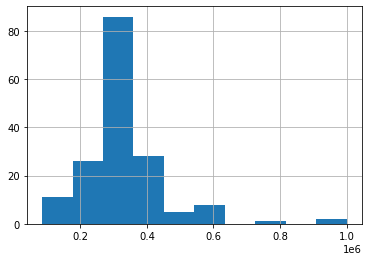

In [196]:
filtered_df['Salary'].hist()

In [198]:
# mean(as the salary rage is mentioned as up to 2.5 - 3lacs, considering the mean of 275000)
mu = 275000

# Perform the t-test
t_statistic, p_value = stats.ttest_1samp(filtered_df['Salary'], mu)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 5.786269849454158
P-value: 3.499024584453967e-08


In [ ]:
# Set the significance level
alpha = 0.05  # 95% confidence level

if p_value < alpha:
    print(f"Reject the null hypothesis. The average salary is not within {mu} range.")
else:
    print(f"Fail to reject the null hypothesis. The average salary is within {mu} range.")


Reject the null hypothesis. The average salary is not within 275000 range.


### T-Test Results:
###### The T-test was conducted to see if the average salary for these roles is within the 2.5-3 lakh range.
###### The p-value from the T-test is extremely low (3.49e-08), which leads to rejecting the null hypothesis.
###### This means that the average salary is significantly different from the 2.5-3 lakh range.

### Conclusion:
###### The data does not support the Times of India's claim that fresh graduates in these roles earn between 2.5-3 lakhs. The actual average salary for these positions, especially for Software Engineers, is higher, with some individuals earning significantly more.

# Is there a relationship between gender and specialization? (i.e. Does the preference of Specialization depend on the Gender?)

In [256]:
# Calculate the proportions
gender_specialization = df.groupby(['Specialization', 'Gender']).size().unstack().fillna(0)

# Convert counts to percentages
gender_specialization_percentage = gender_specialization.div(gender_specialization.sum(axis=1), axis=0) * 100

# Format the DataFrame to display percentages
gender_specialization_percentage = gender_specialization_percentage.applymap(lambda x: f'{x:.2f}%')
gender_specialization_percentage

Gender,f,m
Specialization,,
aeronautical engineering,33.33%,66.67%
applied electronics and instrumentation,22.22%,77.78%
automobile/automotive engineering,0.00%,100.00%
biomedical engineering,100.00%,0.00%
biotechnology,60.00%,40.00%
ceramic engineering,0.00%,100.00%
chemical engineering,11.11%,88.89%
civil engineering,20.69%,79.31%
computer and communication engineering,0.00%,100.00%


##### The data clearly shows that gender plays a role in the choice of specialization. Engineering fields like Mechanical, Electrical, and Civil Engineering are mostly chosen by men, while women are more likely to be found in fields like Biomedical Engineering and Biotechnology. Some areas, like Computer Science, are more balanced, but the trend still leans towards male dominance in most technical specializations.

In simple terms, it seems that men and women gravitate towards different fields, likely influenced by cultural norms or personal interests. This highlights the ongoing gender divide in certain areas of study.

# Do male and female graduates with the same specialization earn significantly different starting salaries?

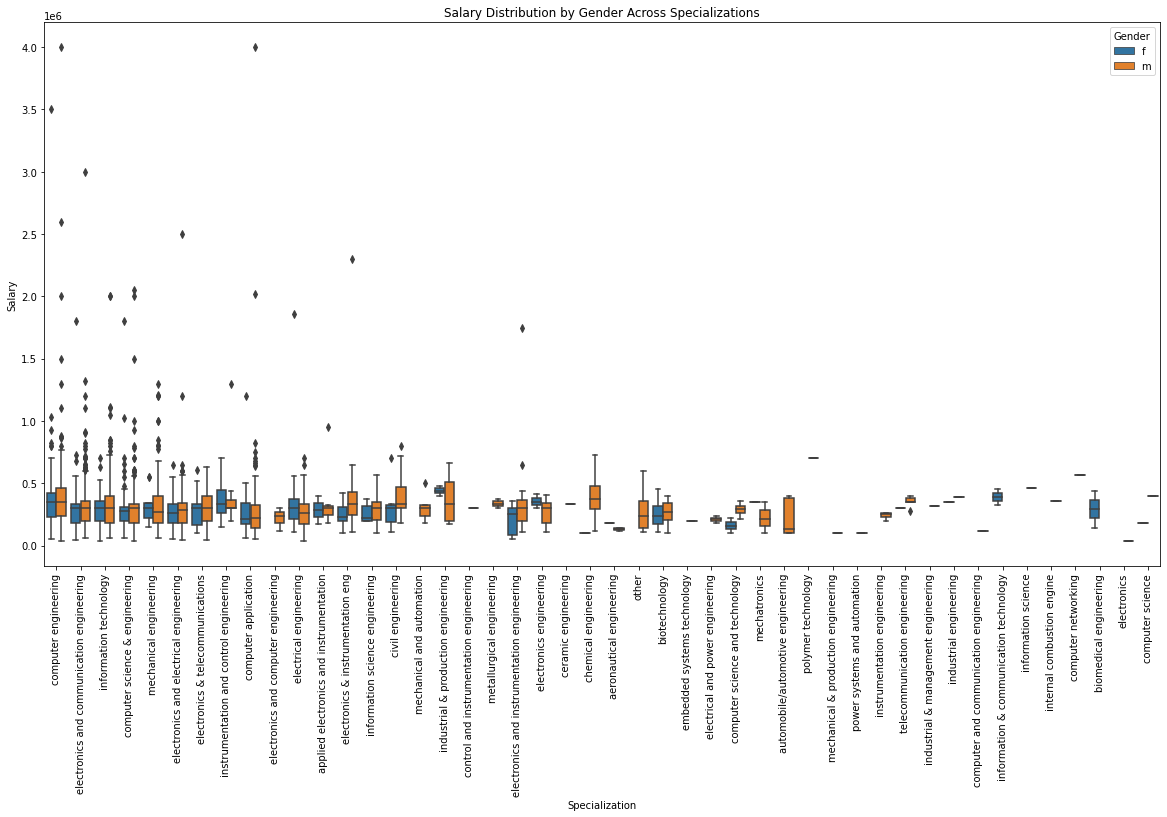

For specialization computer engineering, there is no significant difference in salary between genders (p-value: 0.5510).
For specialization electronics and communication engineering, there is a significant difference in salary between genders (p-value: 0.0442).
For specialization information technology, there is no significant difference in salary between genders (p-value: 0.0865).
For specialization computer science & engineering, there is no significant difference in salary between genders (p-value: 0.4180).
For specialization mechanical engineering, there is no significant difference in salary between genders (p-value: 0.9752).
For specialization electronics and electrical engineering, there is no significant difference in salary between genders (p-value: 0.4731).
For specialization electronics & telecommunications, there is no significant difference in salary between genders (p-value: 0.6262).
For specialization instrumentation and control engineering, there is no significant diffe

In [264]:
# Group by Specialization and Gender
grouped = df.groupby(['Specialization', 'Gender'])['Salary'].agg(['mean', 'std', 'count']).reset_index()

# Visualization
plt.figure(figsize=(20, 10))
sns.boxplot(x='Specialization', y='Salary', hue='Gender', data=df)
plt.xticks(rotation=90)
plt.title('Salary Distribution by Gender Across Specializations')
plt.show()

# T-test for each specialization
specializations = df['Specialization'].unique()
results = {}
for spec in specializations:
    male_salaries = df[(df['Specialization'] == spec) & (df['Gender'] == 'm')]['Salary']
    female_salaries = df[(df['Specialization'] == spec) & (df['Gender'] == 'f')]['Salary']
    
    if len(male_salaries) > 1 and len(female_salaries) > 1:  # Ensure there are enough data points
        t_stat, p_value = stats.ttest_ind(male_salaries, female_salaries)
        results[spec] = p_value

# Print the results
for spec, p_value in results.items():
    if p_value < 0.05:
        print(f"For specialization {spec}, there is a significant difference in salary between genders (p-value: {p_value:.4f}).")
    else:
        print(f"For specialization {spec}, there is no significant difference in salary between genders (p-value: {p_value:.4f}).")


# Final Conclusion:
##### The EDA project highlights key trends and disparities in the engineering job market for fresh graduates. While most specializations offer comparable salaries regardless of gender, certain fields and locations offer higher earning potential. Gender remains a significant factor in specialization choices, but it does not strongly influence salary within most fields. This analysis provides valuable insights for students, educators, and employers looking to understand the factors that impact early career outcomes in engineering.






